In [142]:
import pandas as pd

In [143]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv')#TODO

In [144]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                    0.0        0.0        0.0       0.0   
1             ...                 3272.0     3455.0     3261.0       0.0   
2             ...                14331.0    14948.0    15549.0    1518.0   
3             ...                28314.0    28959.0    29547.0    2000.0   
4             ...                20940.0    19146.0    19131.0    2000.0   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     689.0       0.0       0.0       0.0       0.0   
1    1000.0    1000.0    1000.0       0.0    2000.0   
2    1500.0    1000.0    1000.0    1000.0    5000.0   
3    2019.0    1200.0    1100.0    1069.0    1000.0   
4   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

In [145]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [146]:
df.shape

(30000, 25)

In [147]:
df['AGE'].median()

34.0

In [148]:
df['LIMIT_BAL'].max()

1000000.0

In [ ]:
#TODO

In [149]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
len(df[(df['SEX']==2) & (df['EDUCATION'] == 2)].index)

8656

In [ ]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO

In [150]:
df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'default.payment.next.month']].groupby('default.payment.next.month').median()

PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
default.payment.next.month                                          
0                               0      0      0      0      0      0
1                               1      0      0      0      0      0

In [151]:
df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default.payment.next.month']].groupby('default.payment.next.month').median()

PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
default.payment.next.month                                                     
0                             2459.5    2247.5    2000.0    1734.0    1765.0   
1                             1636.0    1533.5    1222.0    1000.0    1000.0   

                            PAY_AMT6  
default.payment.next.month            
0                             1706.0  
1                             1000.0

In [ ]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table #TODO

In [152]:
# нечеткое описание задания, поэтому вывел вот так
df.pivot_table( values='ID', index=['SEX', 'EDUCATION'],columns=['MARRIAGE'], aggfunc='count')

MARRIAGE          0       1       2     3
SEX EDUCATION                            
1   0           NaN     2.0     6.0   NaN
    1           1.0  1690.0  2633.0  30.0
    2           1.0  2370.0  2940.0  63.0
    3          12.0  1048.0   894.0  36.0
    4           NaN    18.0    23.0   1.0
    5           NaN    48.0    46.0   1.0
    6           NaN    14.0    11.0   NaN
2   0           NaN     2.0     4.0   NaN
    1           3.0  2032.0  4176.0  20.0
    2           5.0  4472.0  4080.0  99.0
    3          32.0  1813.0  1015.0  67.0
    4           NaN    34.0    45.0   2.0
    5           NaN   102.0    81.0   2.0
    6           NaN    14.0    10.0   2.0

In [153]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO

In [154]:
def check_limit(s):
    if s<=10000:
        return 'A'
    elif s<=100000:
        return 'B'
    elif s<=200000:
        return 'C'
    elif s<=400000:
        return 'D'
    elif s<=700000:
        return 'E'
    else:
        return 'F'

In [ ]:
#df['LIMIT_BAL'].map(check_limit)

In [155]:
df['LimitCat']=df['LIMIT_BAL'].map(check_limit)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

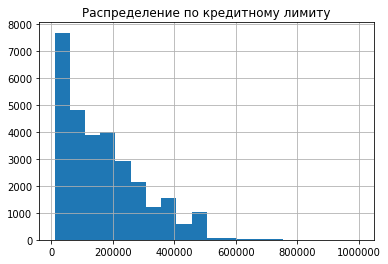

In [103]:
df['LIMIT_BAL'].hist(bins=20)
plt.title("Распределение по кредитному лимиту");

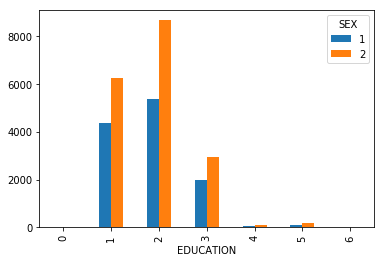

In [65]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
df #TODO

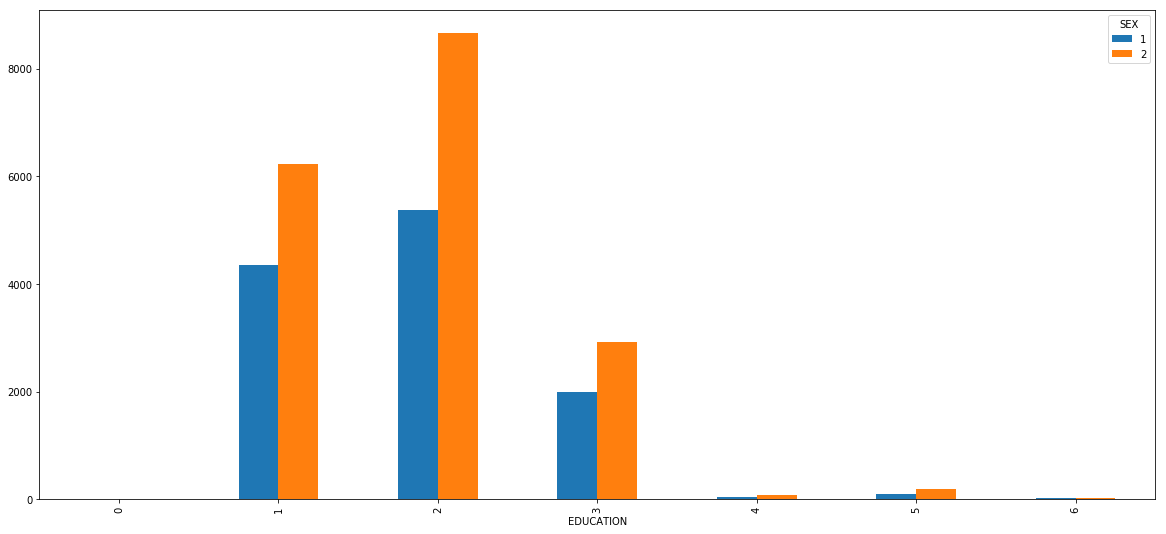

In [113]:
_, ax = plt.subplots(figsize=(20,9))

df.pivot_table(values='ID', index='EDUCATION', columns='SEX', aggfunc='count').plot(
    kind='bar', ax=ax
)
plt.show()

In [66]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO

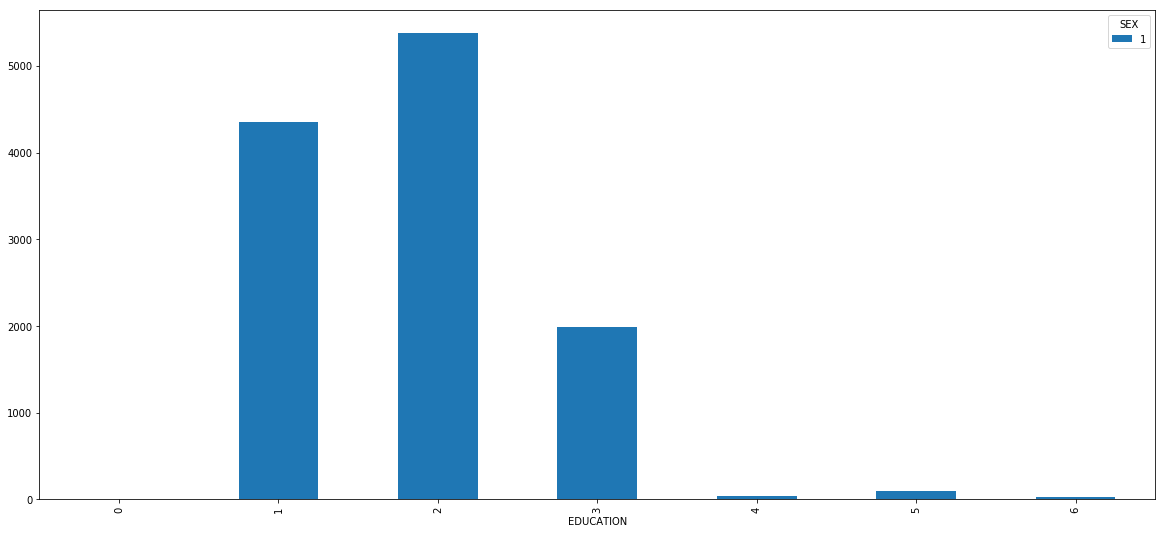

In [114]:
_, ax = plt.subplots(figsize=(20,9))

df[df['SEX']==1].pivot_table(values='ID', index='EDUCATION', columns='SEX', aggfunc='count').plot(
    kind='bar', ax=ax
)
plt.show()

In [4]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO

In [115]:
import seaborn as sns

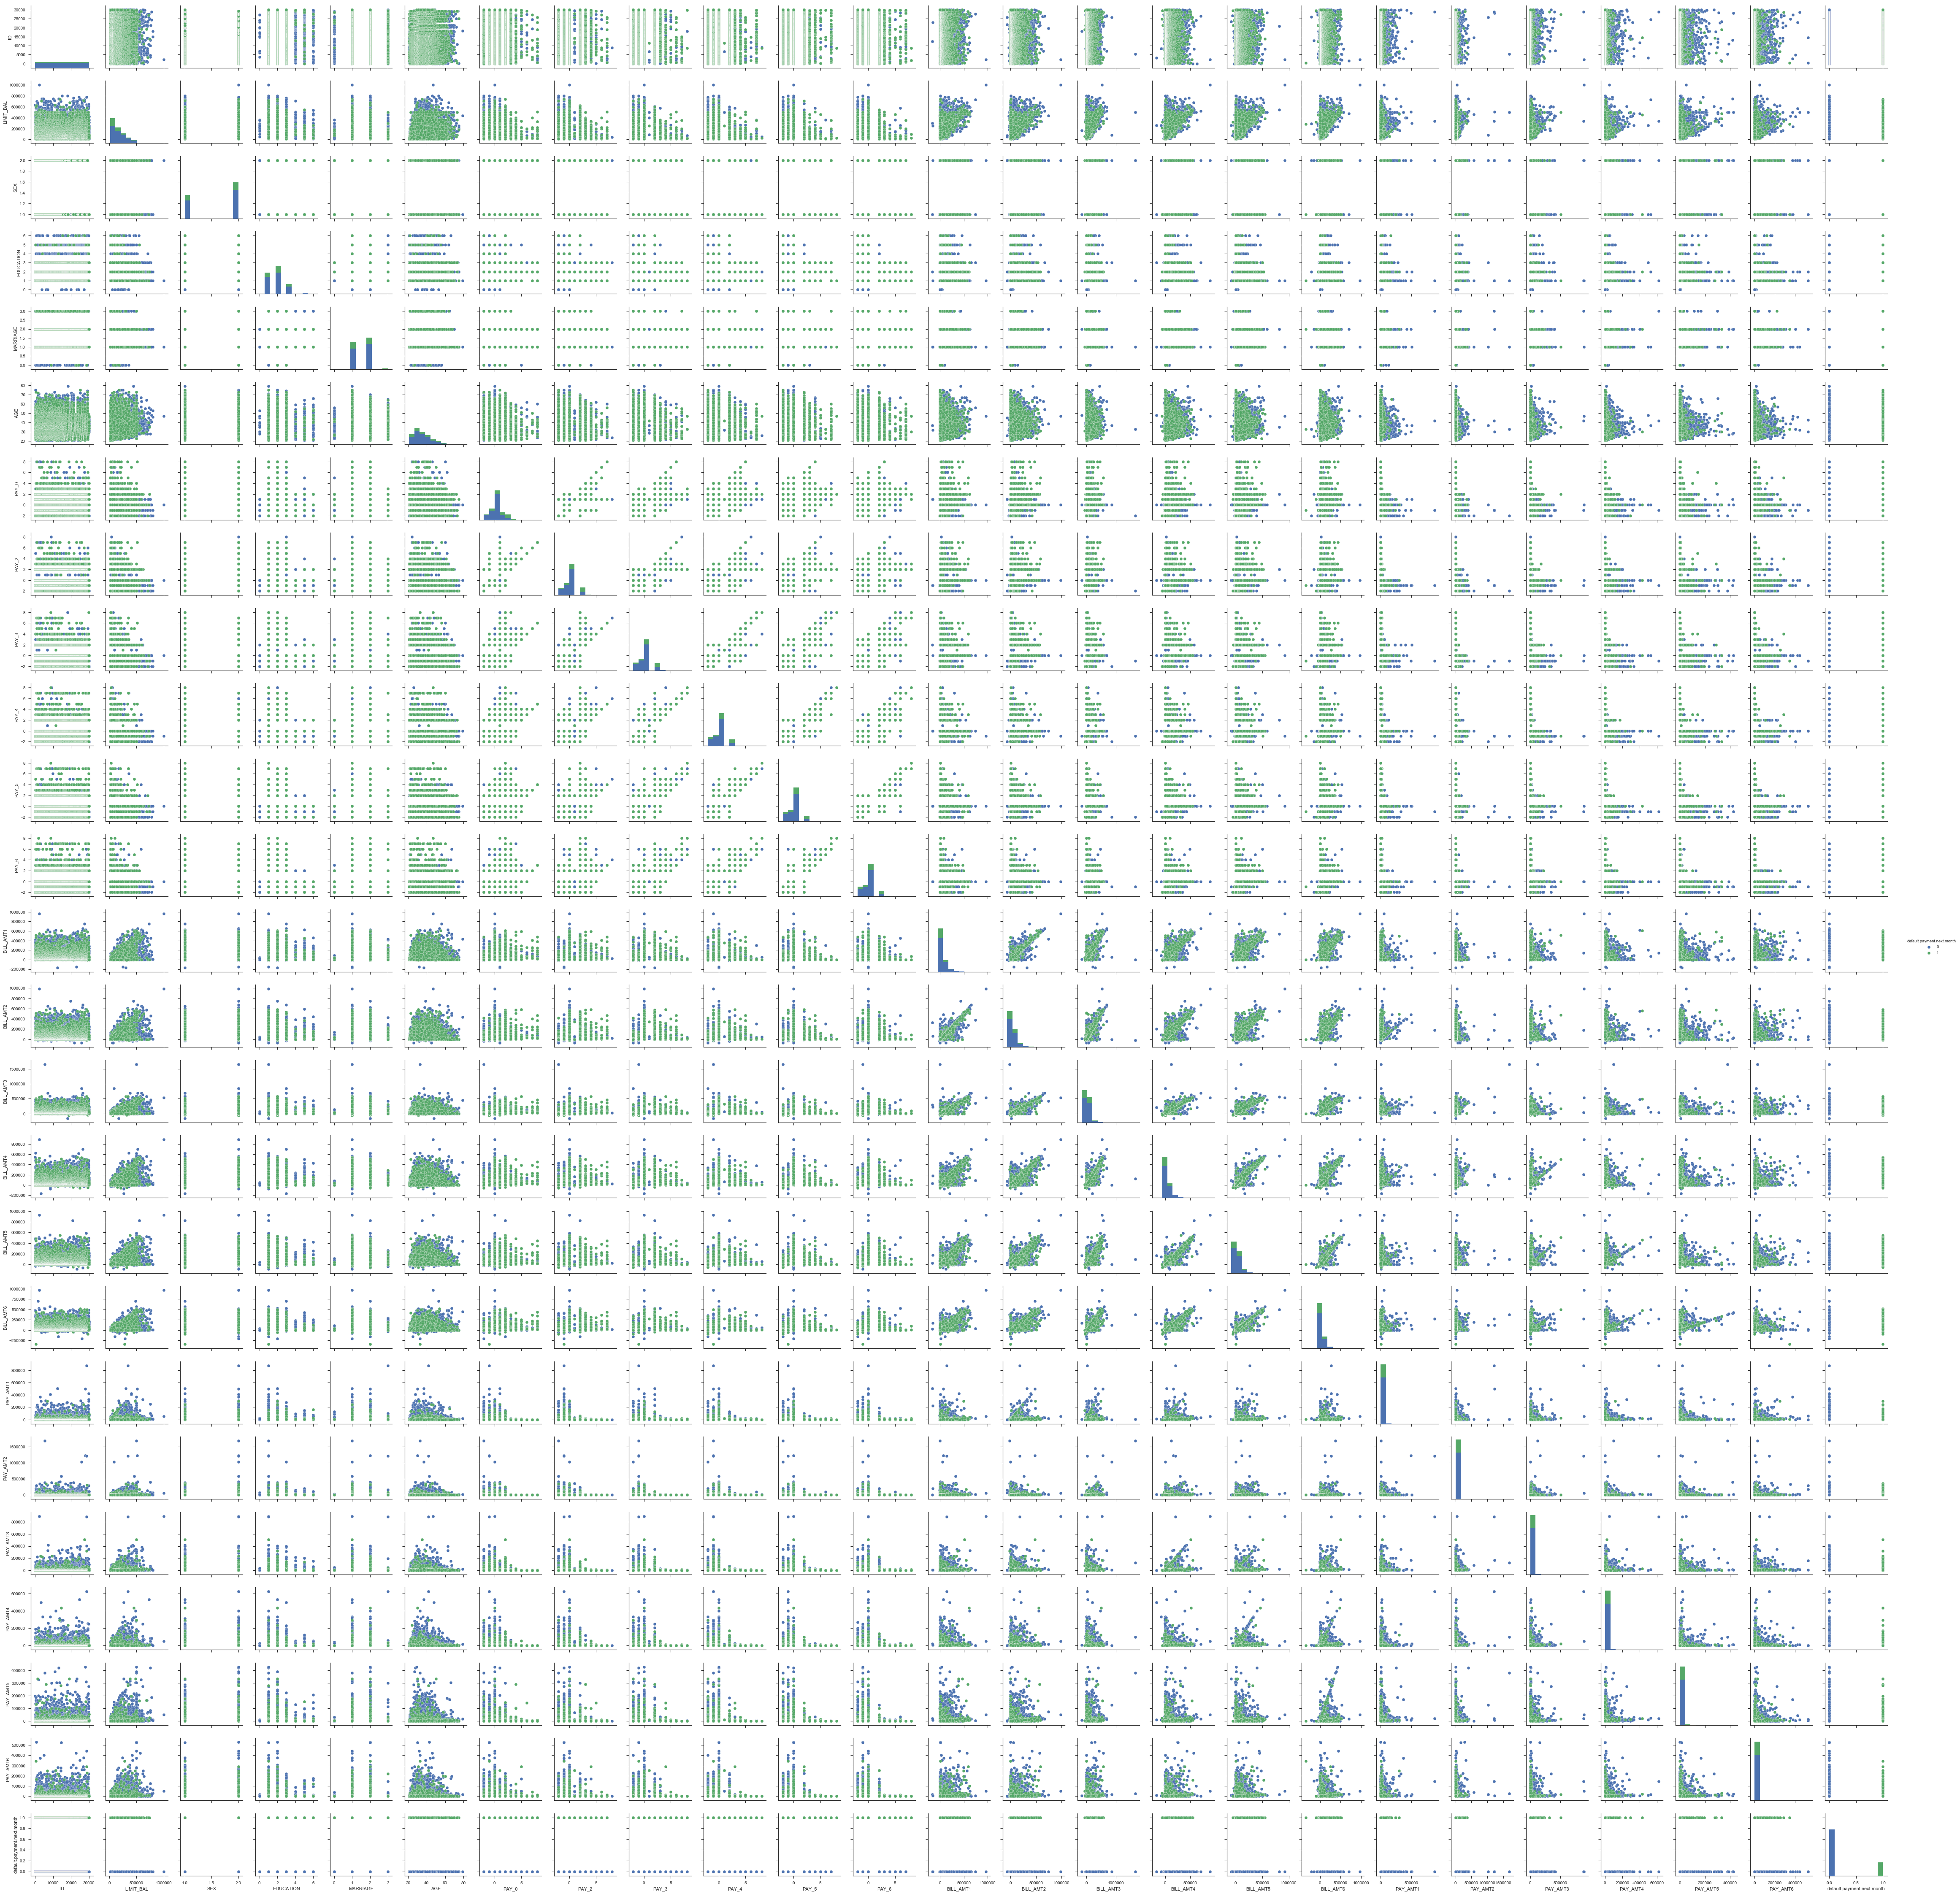

In [117]:
sns.set(style="ticks")

sns.pairplot(df, hue="default.payment.next.month")

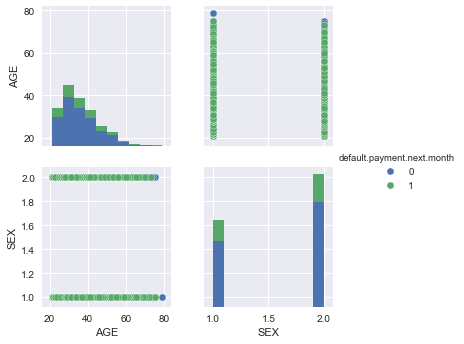

In [127]:
sns.pairplot(df, hue="default.payment.next.month",vars=["AGE", "SEX"])

In [158]:
import numpy as np

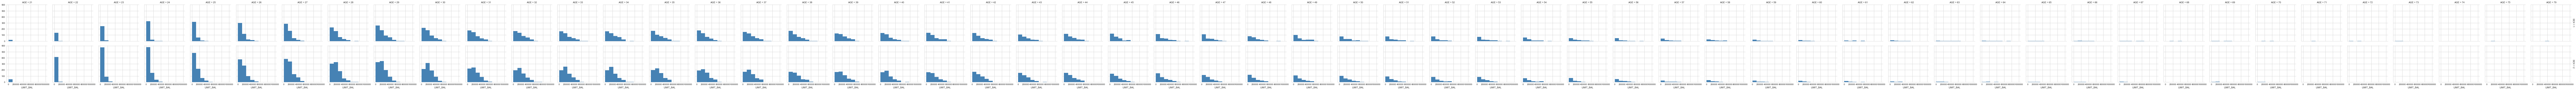

In [163]:

g = sns.FacetGrid(df, row="SEX", col="AGE", margin_titles=True)
bins = np.linspace(0, df["LIMIT_BAL"].max(), 10)
g.map(plt.hist, "LIMIT_BAL", color="steelblue", bins=bins, lw=1)